# Decision Tree Classification


In [1]:
import logging

# Set up logging
logging.basicConfig(filename='Decision_Tree.log', level=logging.INFO,
                    format="%(asctime)s:%(levelname)s:%(message)s", filemode='w')



In [2]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import fetch_openml

logging.info("Libraries imported successfully")

In [3]:
# Load Titanic Dataset (Classification)
titanic = sns.load_dataset("titanic")

logging.info("Titanic dataset loaded successfully")

In [4]:
# Display the first 5 rows of the dataset
print(titanic.head())

logging.info("First 5 rows of the dataset displayed successfully")

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
# check for missing values
print(titanic.isnull().sum())

logging.info("Missing values checked successfully")

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# check info 
print(titanic.info())

logging.info("Info checked successfully")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


## Preprocessing the Data

In [7]:
# Data Preprocessing for Classification
titanic.drop(columns=["deck", "embark_town", "alive", "class", "who", "adult_male"], inplace=True)  # Drop non-useful cols

logging.info("Non-useful columns dropped successfully")

In [8]:
titanic.dropna(inplace=True)  # Drop missing values

logging.info("Missing values dropped successfully")

In [9]:
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})  # Encode categorical

logging.info("Categorical values encoded successfully")

In [10]:
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})  # Encode categorical

logging.info("Categorical values encoded successfully")

In [11]:
X_clf = titanic.drop(columns=["survived"])
y_clf = titanic["survived"]

logging.info("X and y for classification created successfully")

In [12]:
# check missing values again
print(titanic.isnull().sum())

logging.info("Missing values checked successfully")

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


## Exploratory Data Analysis (EDA)

In [13]:
logging.info("Exploratory Data Analysis for Classification")

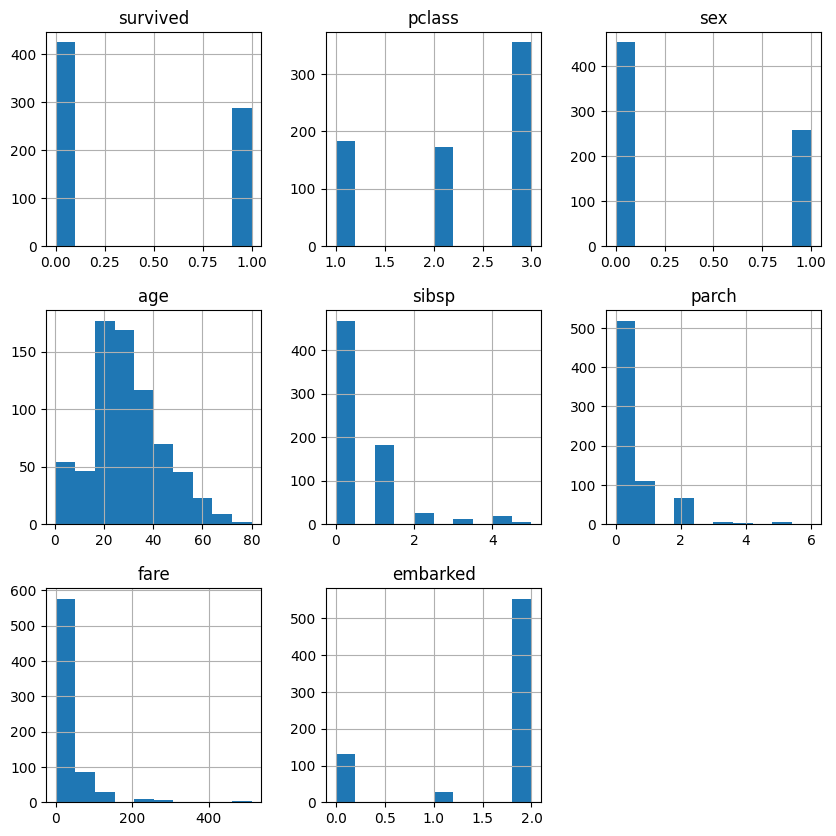

In [14]:
# Distribution of all features
titanic.hist(figsize=(10, 10))
plt.show()

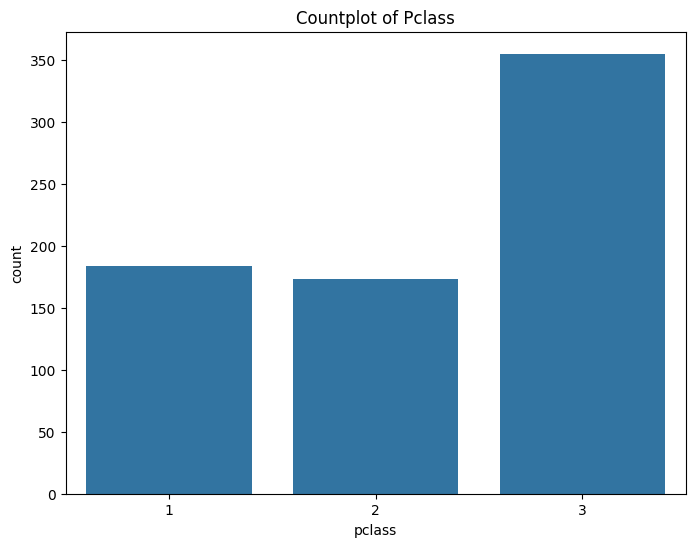

In [15]:
# Countplot of Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=titanic)
plt.title('Countplot of Pclass')
plt.show()

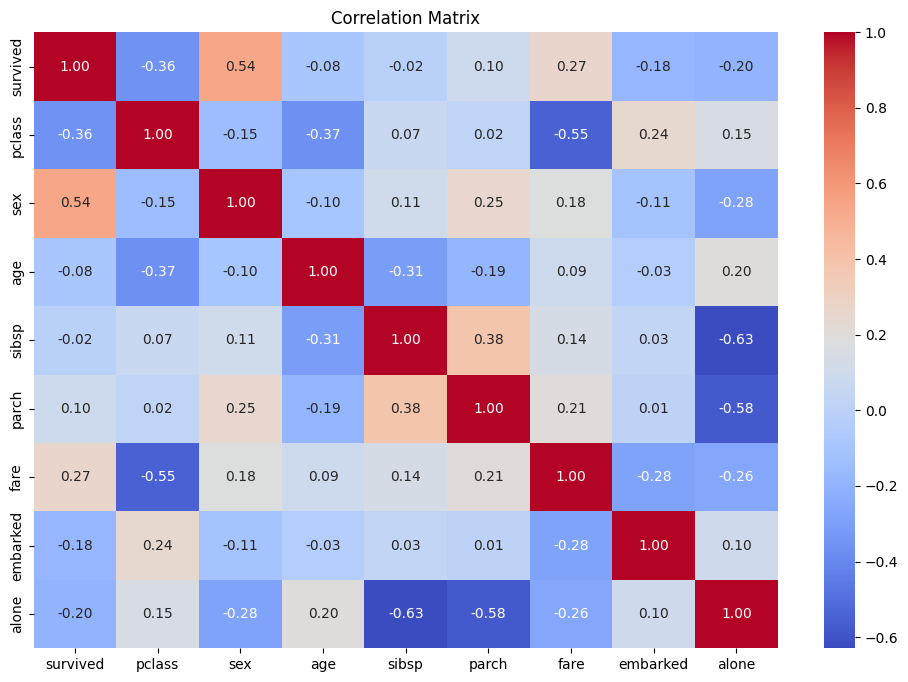

In [16]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

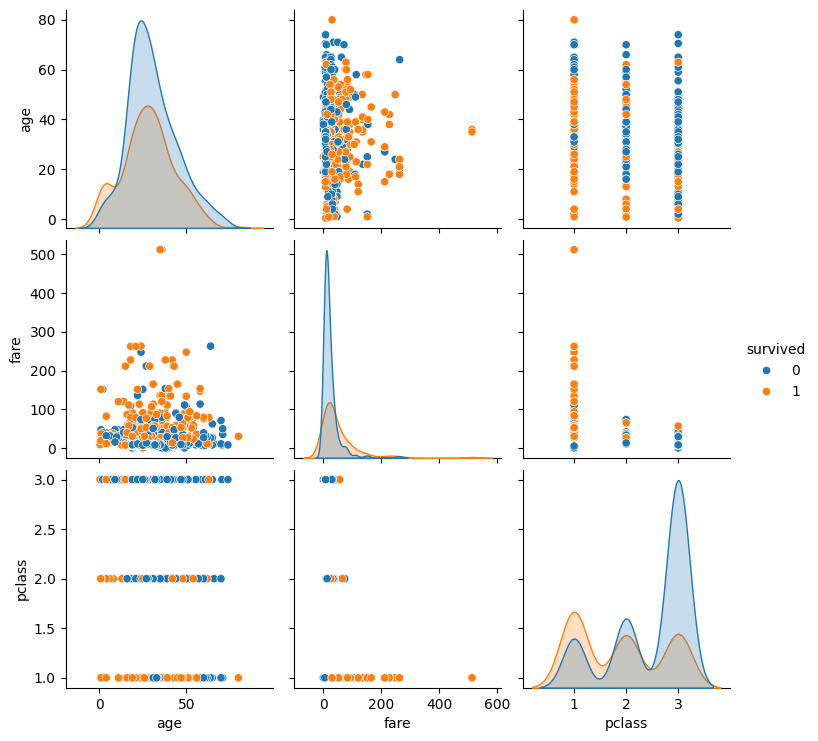

In [17]:
# pairplot of some selected features
sns.pairplot(titanic, hue='survived', vars=['age', 'fare', 'pclass'])
plt.show()


In [18]:
# Train-Test Split for Titanic
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

logging.info("Train-Test split for classification done successfully")


## Decision Tree Classification

In [19]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train_clf, y_train_clf)

logging.info("Decision Tree Classifier trained successfully")

In [20]:
# Predictions and Accuracy
y_pred_clf = clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"🚢 Decision Tree Classifier Accuracy (Titanic): {accuracy:.2f}")

logging.info(f"Decision Tree Classifier Accuracy (Titanic): {accuracy:.2f}")

🚢 Decision Tree Classifier Accuracy (Titanic): 0.74


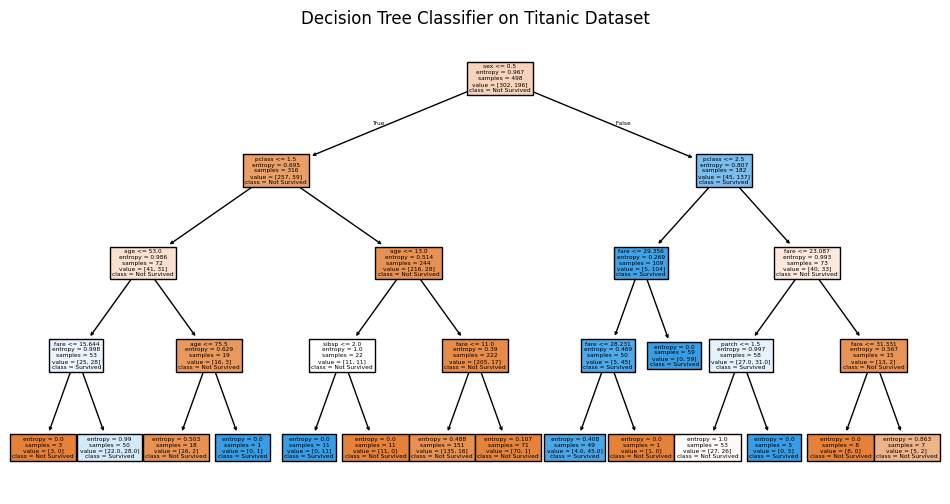

In [21]:
# Visualizing the Classification Tree
plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=X_clf.columns, class_names=["Not Survived", "Survived"])
plt.title("Decision Tree Classifier on Titanic Dataset")
plt.show()

logging.info("Classification Tree visualized successfully")

## Decision Tree Regression 

In [22]:
# Load House Prices Dataset (Regression)
house_prices = fetch_openml(name="house_prices", version=1, as_frame=True)
df_house = house_prices.frame

logging.info("House Prices dataset loaded successfully")

In [23]:
# Data Preprocessing for Regression
df_house = df_house.select_dtypes(include=[np.number])  # Keep only numerical features
df_house.dropna(inplace=True)  # Drop missing values
X_reg = df_house.drop(columns=["SalePrice"])
y_reg = df_house["SalePrice"]

logging.info("X and y for regression created successfully")

In [24]:
# Train-Test Split for House Prices
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

logging.info("Train-Test split for regression done successfully")

In [25]:
# Train Decision Tree Regressor
reg = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)
reg.fit(X_train_reg, y_train_reg)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [26]:
logging.info("Decision Tree Regressor trained successfully")

In [27]:
# Predictions and MSE
y_pred_reg = reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"🏡 Decision Tree Regressor MSE (House Prices): {mse:.2f}")

logging.info(f"Decision Tree Regressor MSE (House Prices): {mse:.2f}")

🏡 Decision Tree Regressor MSE (House Prices): 1823818605.44


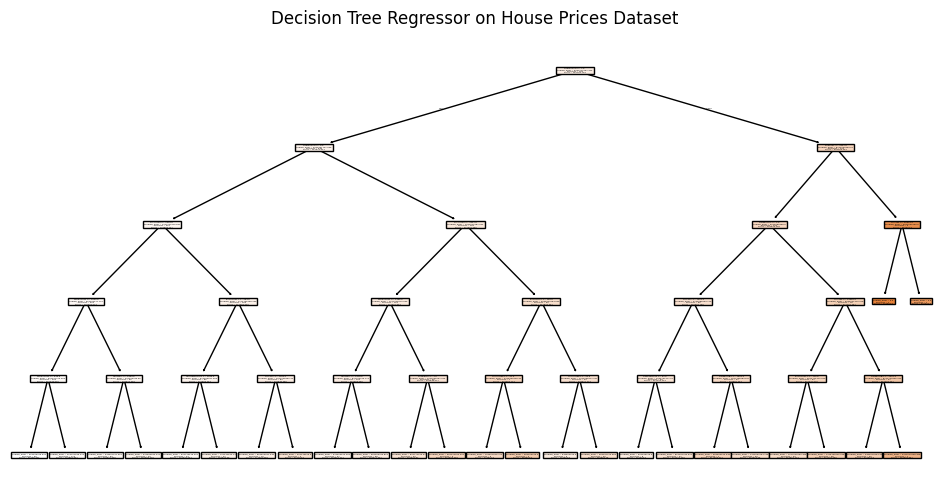

In [28]:
# Visualizing the Regression Tree
plt.figure(figsize=(12,6))
plot_tree(reg, filled=True, feature_names=X_reg.columns)
plt.title("Decision Tree Regressor on House Prices Dataset")
plt.show()

logging.info('Regression tree visualize successfully')

In [29]:
# Save Titanic dataset to Excel
titanic.to_excel('titanic_dataset.xlsx', index=False)

# Save House Prices dataset to Excel
df_house.to_excel('house_prices_dataset.xlsx', index=False)

logging.info("Datasets saved to Excel successfully")